In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['insurance.csv']


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data into pandas dataframe**

In [3]:
df = pd.read_csv("../input/insurance.csv")

**Examining the data**


**Observations**

There are 1338 observations and 7 columns for insurance dataset.


In [4]:
df.shape

(1338, 7)

Columns in data frame

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
df.head(5).T    

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.8,33,22.7,28.9
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
expenses,16884.9,1725.55,4449.46,21984.5,3866.86


In [8]:
df.tail(10).T

,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,23,52,57,23,52,50,18,18,21,61
sex,female,male,female,female,female,male,female,female,female,female
bmi,24.2,38.6,25.7,33.4,44.7,31,31.9,36.9,25.8,29.1
children,2,2,2,0,3,3,0,0,0,0
smoker,no,no,no,no,no,no,no,no,no,yes
region,northeast,southwest,southeast,southwest,southwest,northwest,northeast,southeast,southwest,northwest
expenses,22395.7,10325.2,12629.2,10795.9,11411.7,10600.5,2205.98,1629.83,2007.95,29141.4


There are no Null Values in the insurance dataset

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
all_columns         = list(df)
numeric_columns     = ['age', 'bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['sex', 'smoker', 'region']


In [11]:
df.isnull().apply(lambda x : [ sum(x), (sum(x) * 100) / df.shape[0]] )

age         [0, 0.0]
sex         [0, 0.0]
bmi         [0, 0.0]
children    [0, 0.0]
smoker      [0, 0.0]
region      [0, 0.0]
expenses    [0, 0.0]
dtype: object

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [13]:
from scipy.stats import kurtosis, skew, stats

In [14]:
print("Summary Statistics of Medical Costs")
print(df['expenses'].describe())
print("skew:  {}".format(skew(df['expenses'])))
print("kurtosis:  {}".format(kurtosis(df['expenses'])))
print("missing charges values: {}".format(df['expenses'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64
skew:  1.5141797167430497
kurtosis:  1.5958213684180036
missing charges values: 0
missing smoker values: 0



**Skewness**

I am Getting positive Skewness , it means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode. *Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

*If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
    *If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
*If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

*So here My data is Highly Skewed. My Skew value is 1.51



**Kurtosis**

Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.

Mesokurtic : It means that the extreme values of the distribution are similar to that of a normal distribution characteristic.

Leptokurtic (Kurtosis > 3): Distribution is longer, tails are fatter which means that data are heavy-tailed or profusion of outliers.

Platykurtic: (Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution which means that data are light-tailed or lack of outliers.

**In this Dataset Kurtosis is Platykurtic:        (Kurtosis < 3) bcoz no Out Liers ****

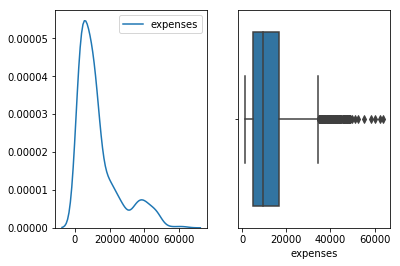

In [15]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['expenses'], ax=axes[0])
sns.boxplot(df['expenses'], ax=axes[1])
plt.show()

Both the boxplot and kernel density estimation plot reveal that the expenses data is right skewed. Furthermore, there are some outliers but no missing charges and smoker values


In [16]:
insur_corr=df.corr()
insur_corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [17]:
insur_cov=df.cov()
insur_cov

,age,bmi,children,expenses
age,197.401387,9.368560,0.719303,5.087480e+04
bmi,9.368560,37.190265,0.092958,1.466515e+04
children,0.719303,0.092958,1.453213,9.926742e+02
expenses,50874.802133,14665.149703,992.674243,1.466524e+08


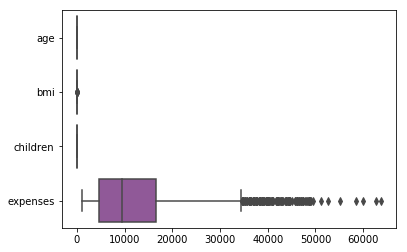

In [18]:
ax = sns.boxplot(data = df, orient = "h", color = "violet", palette = "Set1")
plt.show()

In [19]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)

In [20]:
x=df[numeric_columns]
outlier_detect(x)


 Outliers for Column :  age  Outliers count  0
[]

 Outliers for Column :  bmi  Outliers count  9
[49.1, 48.1, 47.5, 47.4, 50.4, 47.6, 52.6, 47.7, 53.1]

 Outliers for Column :  children  Outliers count  0
[]

 Outliers for Column :  expenses  Outliers count  139
[39611.76, 36837.47, 37701.88, 38711.0, 35585.58, 51194.56, 39774.28, 48173.36, 38709.18, 37742.58, 47496.49, 37165.16, 39836.52, 43578.94, 47291.06, 47055.53, 39556.49, 40720.55, 36950.26, 36149.48, 48824.45, 43753.34, 37133.9, 34779.62, 38511.63, 35160.13, 47305.31, 44260.75, 41097.16, 43921.18, 36219.41, 46151.12, 42856.84, 48549.18, 47896.79, 42112.24, 38746.36, 42124.52, 34838.87, 35491.64, 42760.5, 47928.03, 48517.56, 41919.1, 36085.22, 38126.25, 42303.69, 46889.26, 46599.11, 39125.33, 37079.37, 35147.53, 48885.14, 36197.7, 38245.59, 48675.52, 63770.43, 45863.21, 39983.43, 45702.02, 58571.07, 43943.88, 39241.44, 42969.85, 40182.25, 34617.84, 42983.46, 42560.43, 40003.33, 45710.21, 46200.99, 46130.53, 40103.89, 34806.47,

In [21]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [22]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Change the column 'Sex' to 'Gender'

In [23]:
df.rename(columns={'sex': 'gender'}, inplace=True, level=None)

In [24]:
df.gender.value_counts()

male      676
female    662
Name: gender, dtype: int64

Check how many duplicated data is there?

In [25]:
df.duplicated().sum()

1

Remove all duplicated data

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

**PLOT THE INSURANCE PREMIUM DATASET**

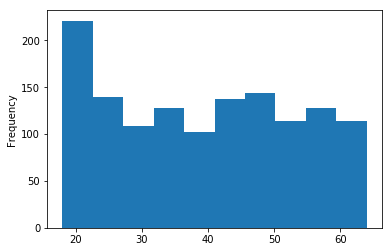

In [28]:
df.age.plot(kind="hist")

In [29]:
df.smoker.count()

1337

Text(0, 0.5, 'count')

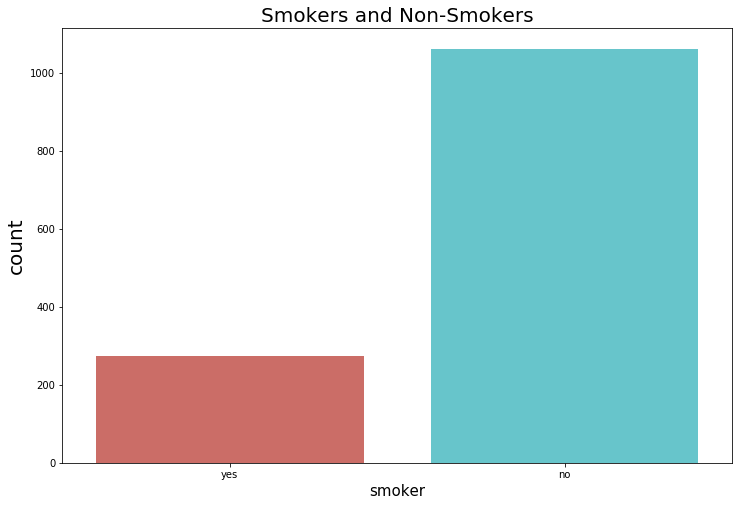

In [30]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="smoker",data=df,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=20)
g.set_xlabel("smoker", fontsize=15)
g.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

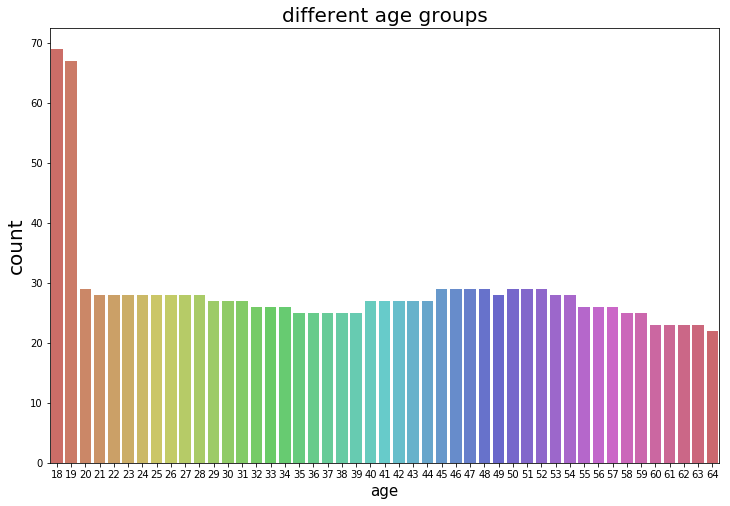

In [31]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="age",data=df,palette='hls')
g.set_title("different age groups", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

**KERNEL DENSITY PLOT - BMI**

Text(0.5, 1.0, 'Frequency Distribuition- bmi')

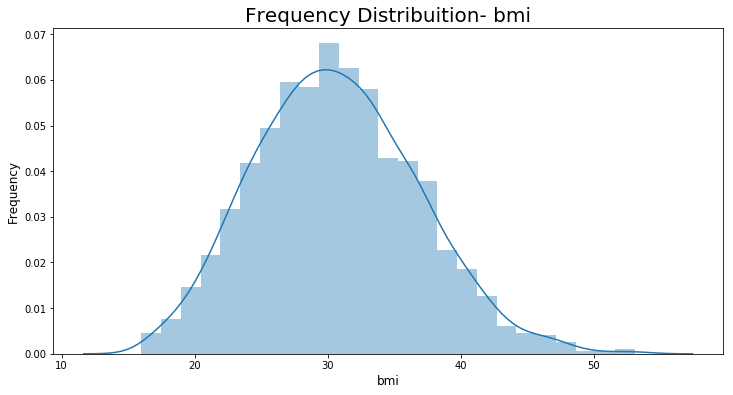

In [32]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["bmi"])
g.set_xlabel("bmi", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- bmi", fontsize=20)

**OBSERVATION**: The curve shows the density plot which is essentially a smooth version of the histogram. The y-axis is in terms of density and the histogram is normalized by default so that it has the same y-scale as the density plot.

**Observation**: The Shape of the Expenses Data is Right Skewed Distribution 

BOX PLOT Using SeaBorn


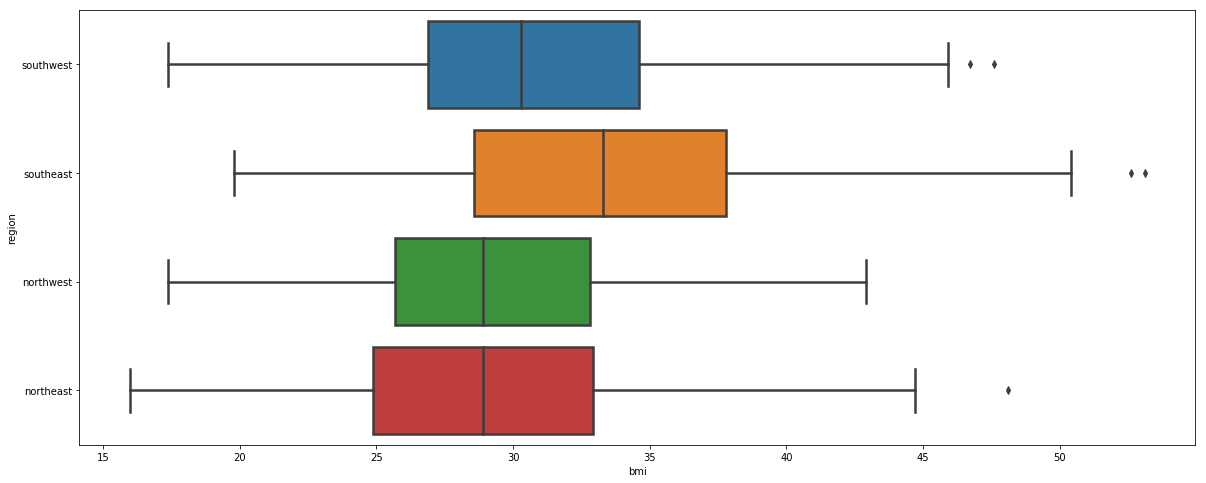

In [33]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="bmi" ,y="region", data=df, linewidth=2.5)
plt.show()

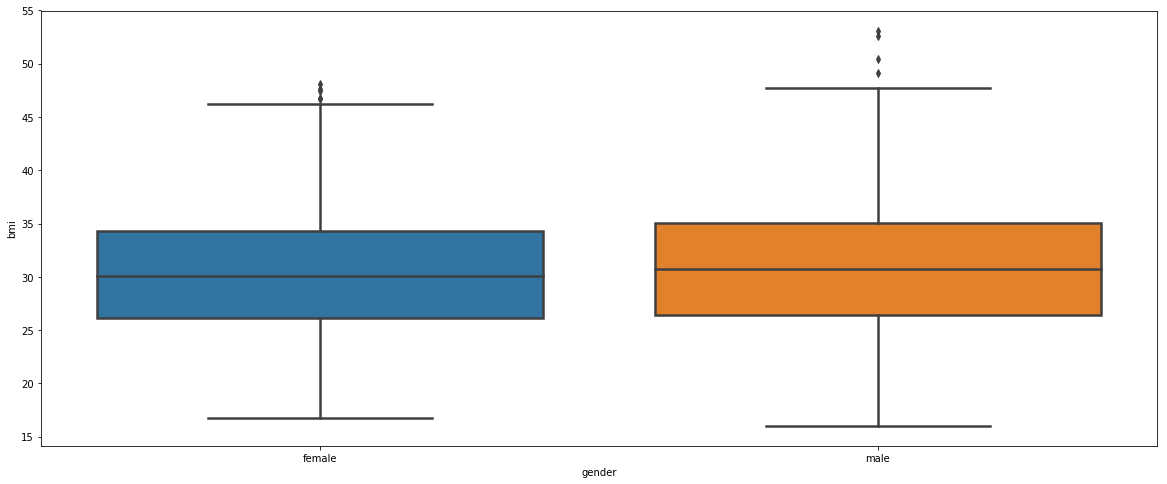

In [34]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="gender" ,y="bmi", data=df, linewidth=2.5)
plt.show()

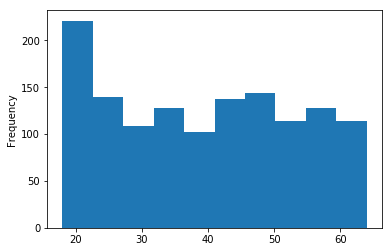

In [35]:
df.age.plot(kind="hist")

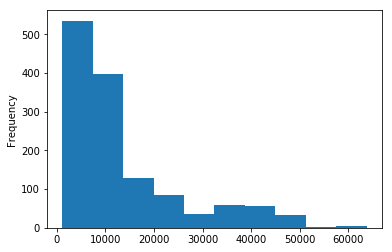

In [36]:
df.expenses.plot(kind="hist")

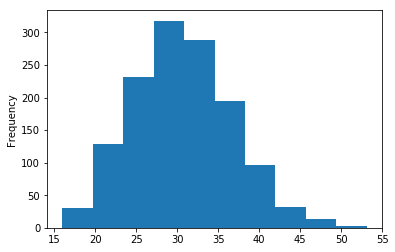

In [37]:
df.bmi.plot(kind="hist")

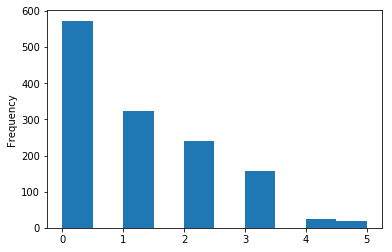

In [38]:
df.children.plot(kind="hist")

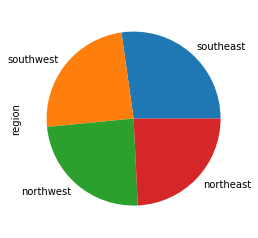

In [39]:
df.region.value_counts().plot(kind="pie")

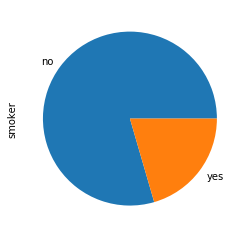

In [40]:
df.smoker.value_counts().plot(kind="pie")

Mean Expenses for Smokers is more than Non Smokers

In [41]:
df.groupby("smoker").expenses.agg(["mean","median","count"])

,mean,median,count
smoker,,,
no,8440.660461,7345.73,1063
yes,32050.231971,34456.35,274


**Observation**: The mean, median and count differences between Smokers and Non Smokers is very large.**

Expenses for male and female

In [42]:
df.groupby("gender").expenses.agg(["mean","median","count"])

,mean,median,count
gender,,,
female,12569.578897,9412.965,662
male,13974.999111,9377.900,675


Mean of Smokers and Non Smokers

In [43]:
df.groupby("smoker").age.mean()

smoker
no     39.404516
yes    38.514599
Name: age, dtype: float64

Correlation Heatmap

Find the correlation of the dataframe and plot it as the heat map

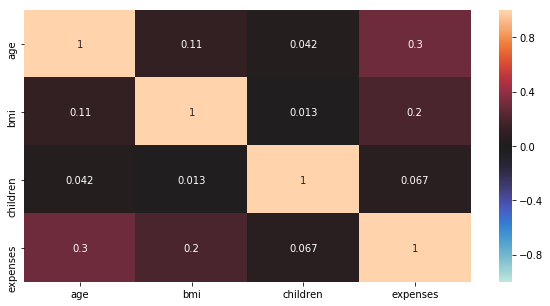

In [44]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

corr = df.corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

**Above correlation and covariance value inform that there exist strong relationship between expenses. AGE (0.3) and BMI(0.2) for numerical variables**

Scatter plots
To create a simple scatter plot, we use the sns.scatterplot command

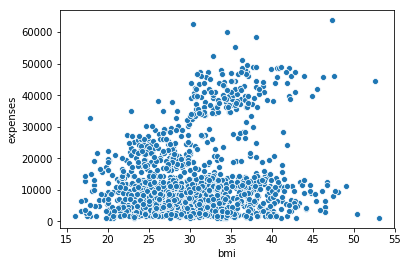

In [45]:
sns.scatterplot(x=df['bmi'], y=df['expenses'])

The scatterplot above suggests that body mass index (BMI) and expenses are positively correlated, where customers with higher BMI typically also tend to pay more in insurance premium (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

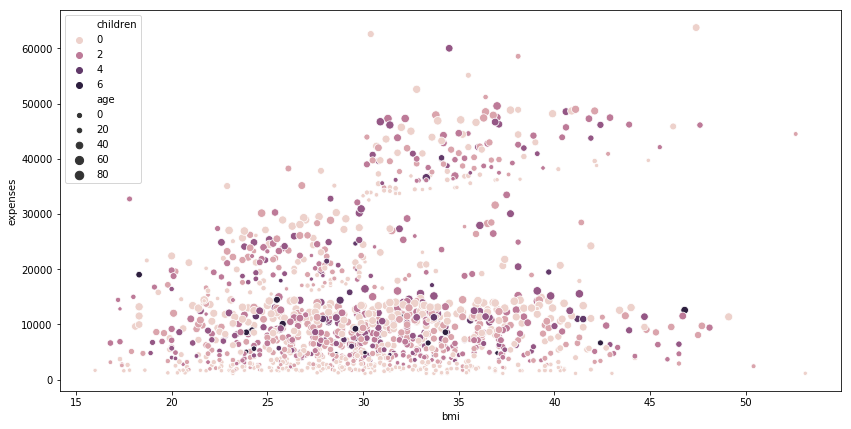

In [46]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['children'],size=df['age'])

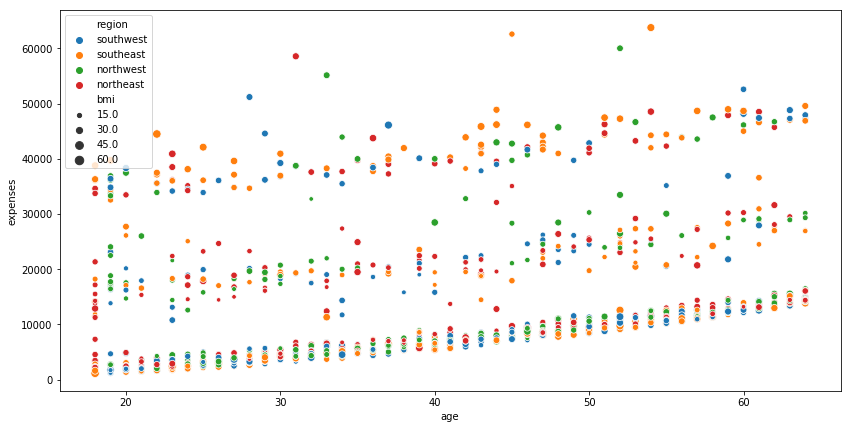

In [47]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['expenses'],hue=df['region'],size=df['bmi'])

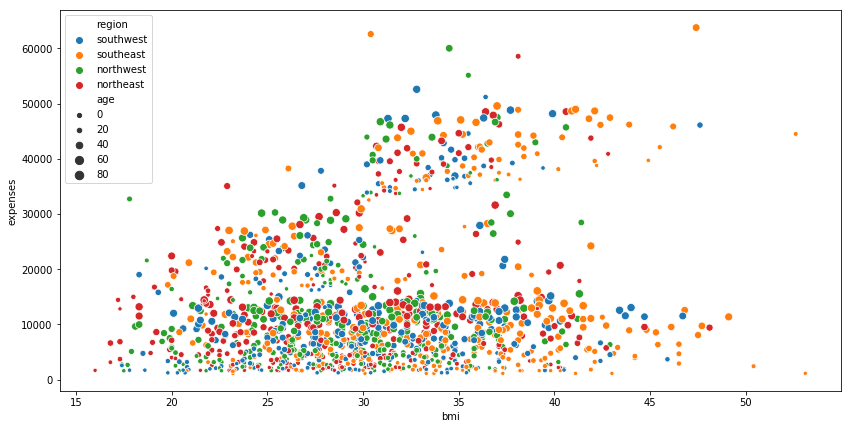

In [48]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['region'],size=df['age'])

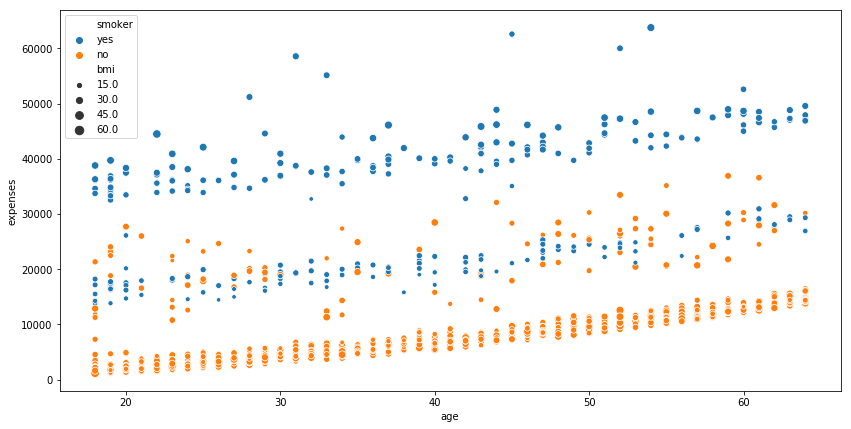

In [49]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['expenses'],hue=df['smoker'],size=df['bmi'])

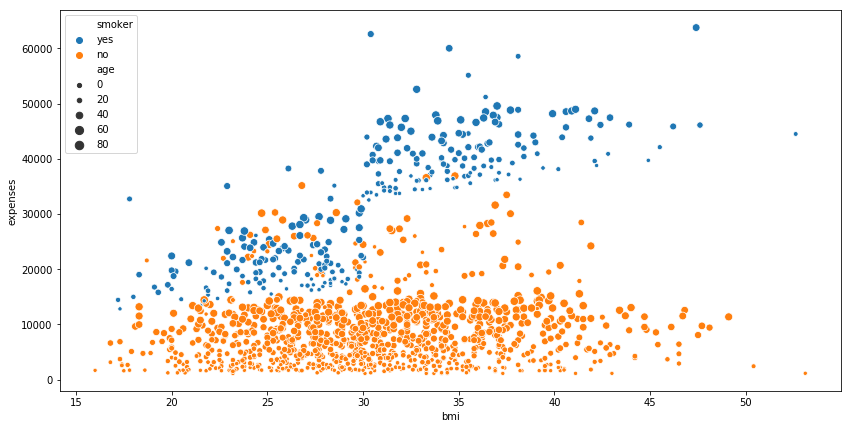

In [50]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['smoker'],size=df['age'])

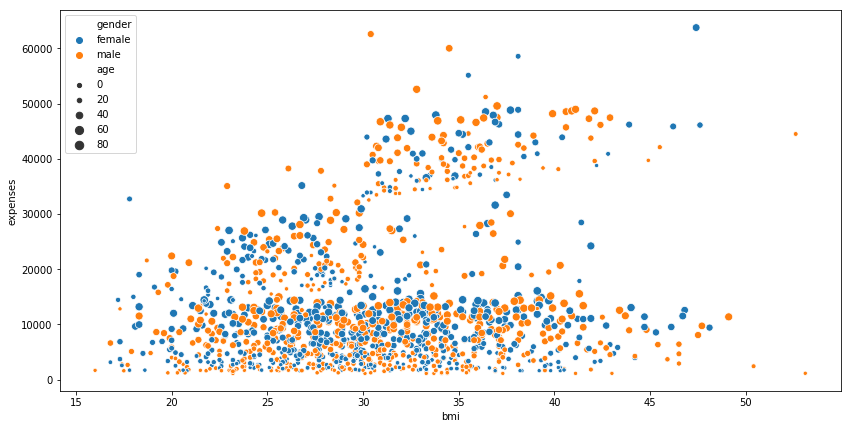

In [51]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['gender'],size=df['age'])

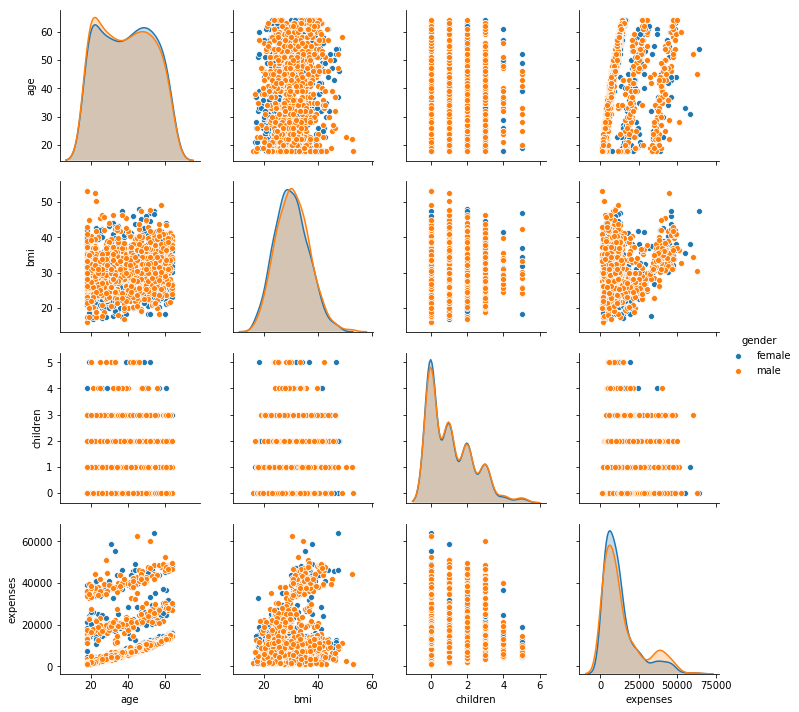

In [52]:
sns.pairplot(data=df,hue='gender')

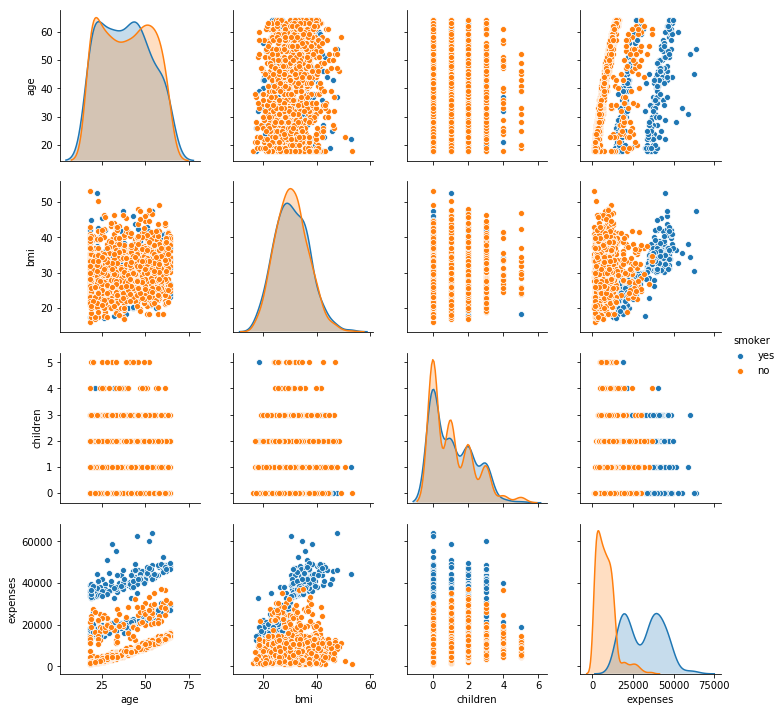

In [53]:
sns.pairplot(data=df,hue='smoker')

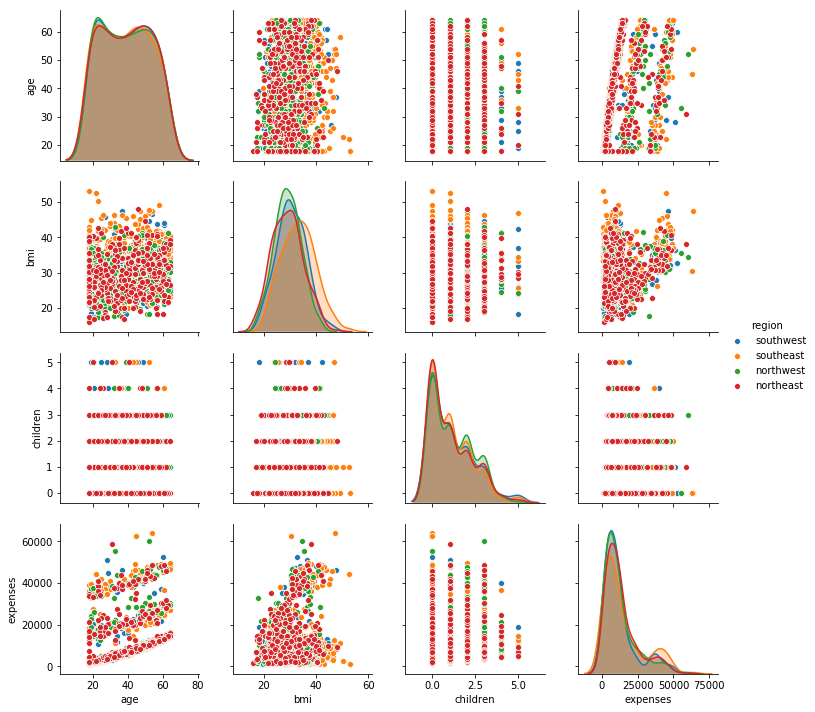

In [54]:
sns.pairplot(data=df,hue='region')

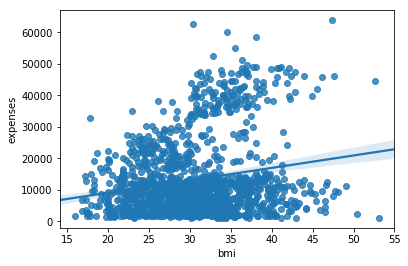

In [55]:
sns.regplot(x=df['bmi'], y=df['expenses'])

**Color-coded scatter plots**
We can use scatter plots to display the relationships between not two, but even three variables. One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance expenses, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'expenses') on the axes.

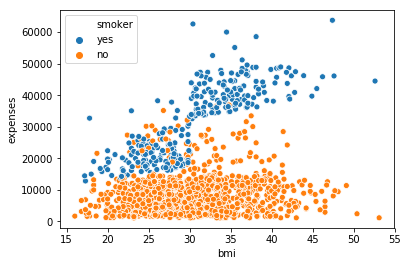

In [56]:
sns.scatterplot(x=df['bmi'], y=df['expenses'], hue=df['smoker'])

In [57]:
This scatter plot shows that nonsmokers tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize, Use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. 
( The below plot shows the regression line of smokers has a much steeper slope when compared to line of nonsmokers!)

SyntaxError: invalid syntax (<ipython-input-57-557fb961f07f>, line 1)

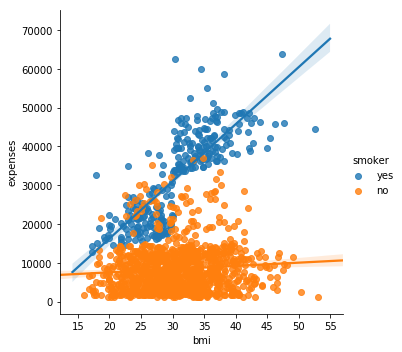

In [58]:
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df)

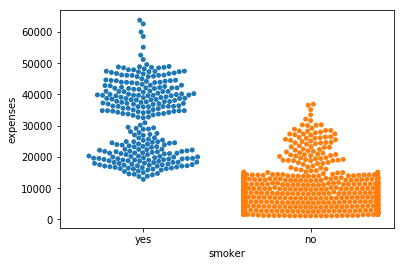

In [59]:
sns.swarmplot(x=df['smoker'],
              y=df['expenses'])

In [60]:
The Swarm plot shows us that: on average, non-smokers are charged less than smokers, and
the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

SyntaxError: invalid syntax (<ipython-input-60-62352596bccd>, line 1)

**Finding the Overall Distribution of Insurance Premium Data**

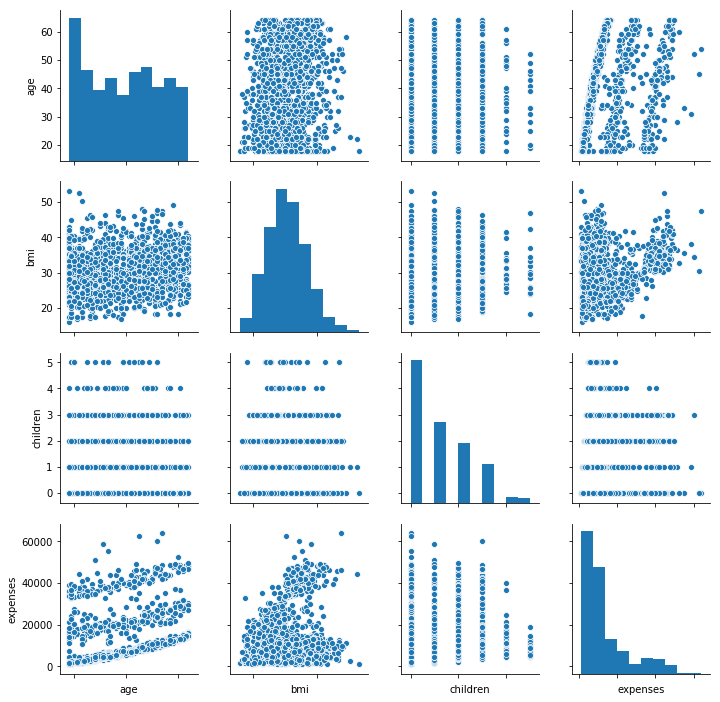

In [61]:
import seaborn as sns
g = sns.pairplot(df)
g.set(xticklabels=[])

LinAlgError: singular matrix

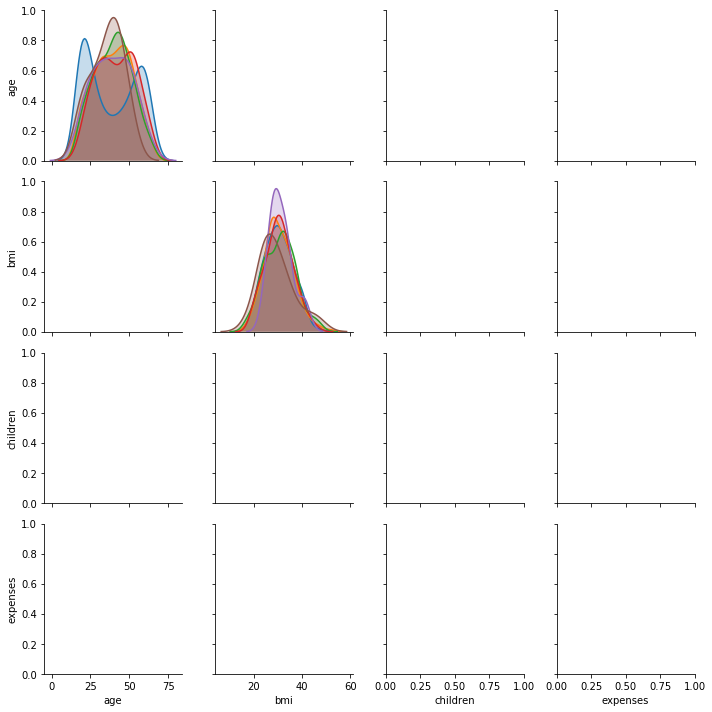

In [62]:
sns.pairplot(data=df,hue='children')

In [63]:
# Importing necessary package for creating model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [64]:
cat_col=['smoker','region','gender']
num_col=[i for i in df.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'expenses']

In [65]:
# one-hot encoding
one_hot=pd.get_dummies(df[cat_col])
insur_procsd_df=pd.concat([df[num_col],one_hot],axis=1)
insur_procsd_df.head(10)

,age,bmi,children,expenses,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,gender_female,gender_male
0,19,27.9,0,16884.92,0,1,0,0,0,1,1,0
1,18,33.8,1,1725.55,1,0,0,0,1,0,0,1
2,28,33.0,3,4449.46,1,0,0,0,1,0,0,1
3,33,22.7,0,21984.47,1,0,0,1,0,0,0,1
4,32,28.9,0,3866.86,1,0,0,1,0,0,0,1
5,31,25.7,0,3756.62,1,0,0,0,1,0,1,0
6,46,33.4,1,8240.59,1,0,0,0,1,0,1,0
7,37,27.7,3,7281.51,1,0,0,1,0,0,1,0
8,37,29.8,2,6406.41,1,0,1,0,0,0,0,1
9,60,25.8,0,28923.14,1,0,0,1,0,0,1,0


In [66]:
#label encoding
insr_procsd_df_label=df
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_col:
    insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
insr_procsd_df_label.head(10)

,age,gender,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
5,31,0,25.7,0,0,2,3756.62
6,46,0,33.4,1,0,2,8240.59
7,37,0,27.7,3,0,1,7281.51
8,37,1,29.8,2,0,0,6406.41
9,60,0,25.8,0,0,1,28923.14


In [67]:
#using one hot encoding
X=insur_procsd_df.drop(columns='expenses')
y=df[['expenses']]

In [68]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1234)

In [69]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# Print Model intercept and co-efficent
print("Model intercept",model.intercept_,"Model co-efficent",model.coef_)

Model intercept [-2.02804338] Model co-efficent [[   254.80507771    331.52281729    509.77181528 -12293.49435187
   12293.49435187    689.79246289     43.0935488    -452.55130361
    -280.33470808    408.31872058   -408.31872058]]


In [71]:
cdf = pd.DataFrame(data=model.coef_.T, index=X.columns, columns=["Coefficients"])
cdf

,Coefficients
age,254.805078
bmi,331.522817
children,509.771815
smoker_no,-12293.494352
smoker_yes,12293.494352
region_northeast,689.792463
region_northwest,43.093549
region_southeast,-452.551304
region_southwest,-280.334708
gender_female,408.318721


In [72]:
# Print various metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print("Predicting the train data")
train_predict = model.predict(train_X)
print("Predicting the test data")
test_predict = model.predict(test_X)
print("MAE")
print("Train : ",mean_absolute_error(train_y,train_predict))
print("Test  : ",mean_absolute_error(test_y,test_predict))
print("====================================")
print("MSE")
print("Train : ",mean_squared_error(train_y,train_predict))
print("Test  : ",mean_squared_error(test_y,test_predict))
print("====================================")
import numpy as np
print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(train_y,train_predict)))
print("Test  : ",np.sqrt(mean_squared_error(test_y,test_predict)))
print("====================================")
print("R^2")
print("Train : ",r2_score(train_y,train_predict))
print("Test  : ",r2_score(test_y,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((train_y - train_predict) / train_y)) * 100)
print("Test  : ",np.mean(np.abs((test_y - test_predict) / test_y)) * 100)

Predicting the train data
Predicting the test data
MAE
Train :  4134.56020507193
Test  :  4230.685888666397
MSE
Train :  37064299.82573061
Test  :  36067136.80464378
RMSE
Train :  6088.04564911685
Test  :  6005.59212772927
R^2
Train :  0.7508771595922443
Test  :  0.7448469285923194
MAPE
Train :  expenses    41.681263
dtype: float64
Test  :  expenses    42.445238
dtype: float64


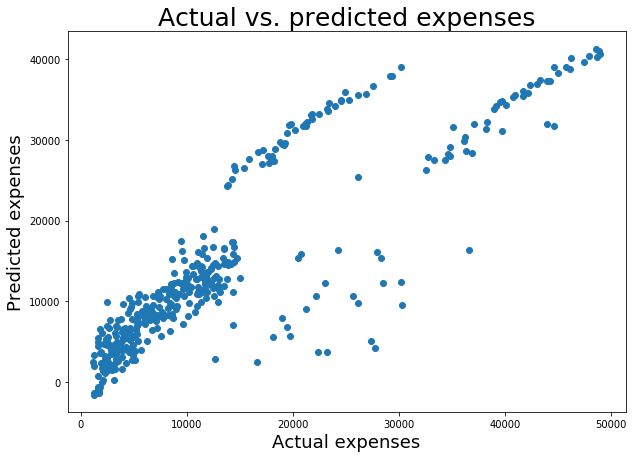

In [73]:
#Plot actual vs predicted value
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted expenses",fontsize=25)
plt.xlabel("Actual expenses",fontsize=18)
plt.ylabel("Predicted expenses", fontsize=18)
plt.scatter(x=test_y,y=test_predict)

**There is no major difference between using label encoding and one-hot encoding. Also predicted expenses are not linear with actual expenses**

In [74]:
print("MAPE")
print("Train : ",np.mean(np.abs((train_y - train_predict) / train_y)) * 100)
print("Test  : ",np.mean(np.abs((test_y - test_predict) / test_y)) * 100)

MAPE
Train :  expenses    41.681263
dtype: float64
Test  :  expenses    42.445238
dtype: float64
